In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import sys
import time
import numpy as np
import theano
import theano.tensor as T
import lasagne
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=False)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


/usr/local/lib/python2.7/dist-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [3]:
# (1) Input/Output variables
varX=T.fmatrix('inputs')
varY=T.ivector('targets')
# (2) Simple Input and FullyConnectd Output
l_inp=lasagne.layers.InputLayer(shape=(None,784), input_var=varX)
l_out=lasagne.layers.DenseLayer(l_inp, num_units=10, nonlinearity=lasagne.nonlinearities.softmax)
prediction = lasagne.layers.get_output(l_out)
# (3) Loss: cross-entropy
loss = lasagne.objectives.categorical_crossentropy(prediction, varY)
loss = loss.mean()
# (4) Train algorithm: Stochastic Gradient Descent (SGD) updates with Nesterov momentum
params = lasagne.layers.get_all_params(l_out, trainable=True)
updates = lasagne.updates.nesterov_momentum(loss, params, learning_rate=0.01, momentum=0.9)
# (5) Configure test loss/prediction/accuracy
test_prediction = lasagne.layers.get_output(l_out, deterministic=True)
test_loss = lasagne.objectives.categorical_crossentropy(test_prediction, varY)
test_loss = test_loss.mean()
test_acc = T.mean(T.eq(T.argmax(test_prediction, axis=1), varY), dtype=theano.config.floatX)
# (6) Compile Theano functions: 
train_fn = theano.function([varX, varY], loss, updates=updates)
val_fn = theano.function([varX, varY], [test_loss, test_acc])
# (7) Run training process:
print("Starting training...")
sizBatch=256
numTrain=mnist.train.images.shape[0]
numVal=mnist.validation.images.shape[0]
numTest=mnist.test.images.shape[0]
numIterPerEpochTrain=numTrain/sizBatch
numIterPerEpochVal=numVal/sizBatch
numIterPerEpochTest=numTest/sizBatch
numEpochs=100
lstInfo=[]
for epoch in range(numEpochs):
    # (1) train:
    train_err = 0
    train_batches = 0
    start_time = time.time()
    for ii in xrange(numIterPerEpochTrain):
        trainX,trainY=mnist.train.next_batch(sizBatch)
        train_err += train_fn(trainX, trainY)
        train_batches += 1
    # (2) validation:
    val_err = 0
    val_acc = 0
    val_batches = 0
    for ii in xrange(numIterPerEpochVal):
        valX,valY=mnist.validation.next_batch(sizBatch)
        err, acc = val_fn(trainX, trainY)
        val_err += err
        val_acc += acc
        val_batches += 1
    # (3) print Train/Validation loss/ACC:
    trainLoss=train_err / train_batches
    valLoss=val_err / val_batches
    valACC=val_acc / val_batches * 100
    print("Epoch {} of {} took {:.3f}s".format(epoch + 1, numEpochs, time.time() - start_time))
    print("  training loss:\t\t{:.6f}".format(trainLoss))
    print("  validation loss:\t\t{:.6f}".format(valLoss))
    print("  validation accuracy:\t\t{:.2f} %".format(valACC))
    # (4) make Info
    lstInfo.append( (epoch, trainLoss, valLoss, valACC) )
print '\n\n\n'
print '-----[ Training FINISHED ]-----'
test_err = 0
test_acc = 0
test_batches = 0
for ii in xrange(numIterPerEpochTest):
    testX,testY=mnist.test.next_batch(sizBatch)
    err, acc = val_fn(testX, testY)
    test_err += err
    test_acc += acc
    test_batches += 1
#
testLoss=test_err/test_batches
testACC=test_acc/test_batches*100
#
print("Final results:")
print("  test loss:\t\t\t{:.6f}".format(testLoss))
print("  test accuracy:\t\t{:.2f} %".format(testACC))

Starting training...
Epoch 1 of 100 took 1.273s
  training loss:		0.765989
  validation loss:		0.453629
  validation accuracy:		89.06 %
Epoch 2 of 100 took 1.341s
  training loss:		0.438522
  validation loss:		0.377678
  validation accuracy:		89.84 %
Epoch 3 of 100 took 1.220s
  training loss:		0.392052
  validation loss:		0.372251
  validation accuracy:		91.41 %
Epoch 4 of 100 took 1.338s
  training loss:		0.367880
  validation loss:		0.344064
  validation accuracy:		91.80 %
Epoch 5 of 100 took 1.218s
  training loss:		0.352703
  validation loss:		0.350744
  validation accuracy:		87.89 %
Epoch 6 of 100 took 1.337s
  training loss:		0.341721
  validation loss:		0.312200
  validation accuracy:		91.02 %
Epoch 7 of 100 took 1.219s
  training loss:		0.333559
  validation loss:		0.319587
  validation accuracy:		91.02 %
Epoch 8 of 100 took 1.334s
  training loss:		0.326774
  validation loss:		0.345671
  validation accuracy:		88.28 %
Epoch 9 of 100 took 1.223s
  training loss:		0.321136
  val

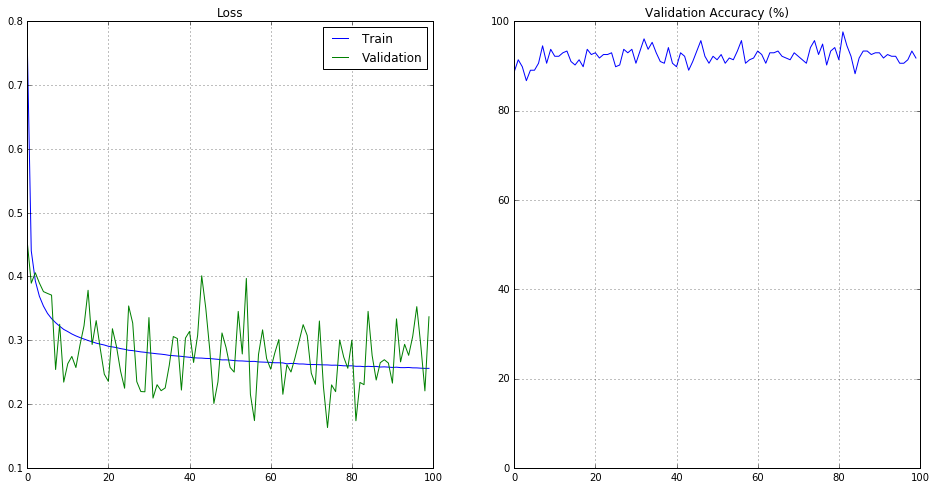

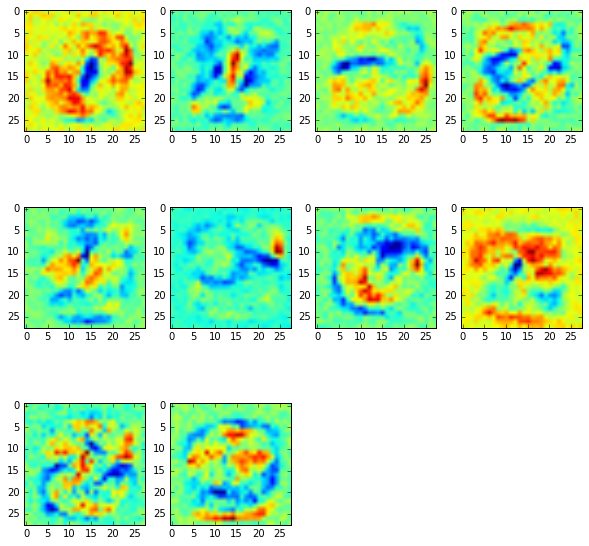

In [52]:
dataInfo=np.array(lstInfo)
plt.figure(figsize=(16,8))
plt.subplot(1,2,1),
plt.hold(True)
plt.plot(dataInfo[:,0], dataInfo[:,1])
plt.plot(dataInfo[:,0], dataInfo[:,2])
plt.legend(('Train', 'Validation'))
plt.title('Loss')
plt.hold(False)
plt.grid(True)
#
plt.subplot(1,2,2),
plt.plot(dataInfo[:,0], dataInfo[:,3])
plt.ylim((0,100))
plt.title('Validation Accuracy (%)')
plt.grid(True)
#
model_Weights=l_out.W.eval()
numx=4
numW=10
numy=numW/numx
if numx*numy<numW:
    numy+=1
plt.figure(figsize=(10,10))
# plt.figtext('Weights')
for xx in xrange(numx):
    for yy in xrange(numy):
        pos=yy*numx+xx
        if pos<numW:
            plt.subplot(numy,numx,pos+1)
            plt.imshow(model_Weights[:,pos].reshape(28,28))